<a href="https://colab.research.google.com/github/haneujeen/ml-projects/blob/main/logistic-regression/tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
# Number of samples and the dimension
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape

In [ ]:
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), # indicates that the expected input will be batches of `D` dimensional vectors
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Train the model
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 44ms/step - loss: 0.7183 - accuracy: 0.6404 - val_loss: 0.7025 - val_accuracy: 0.5904
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6824 - val_loss: 0.6409 - val_accuracy: 0.6649
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6110 - accuracy: 0.7218 - val_loss: 0.5869 - val_accuracy: 0.7021
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7612 - val_loss: 0.5408 - val_accuracy: 0.7553
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5292 - accuracy: 0.7717 - val_loss: 0.5017 - val_accuracy: 0.7819
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4953 - accuracy: 0.8031 - val_loss: 0.4682 - val_accuracy: 0.7979
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4654 - accuracy: 0.8189 - val_loss: 0.4396 - val_accuracy: 0.8138
Epoch 8/100


In [ ]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9816
Train score: [0.0879453718662262, 0.9816272854804993]
6/6 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9734
Test score: [0.10411636531352997, 0.9734042286872864]


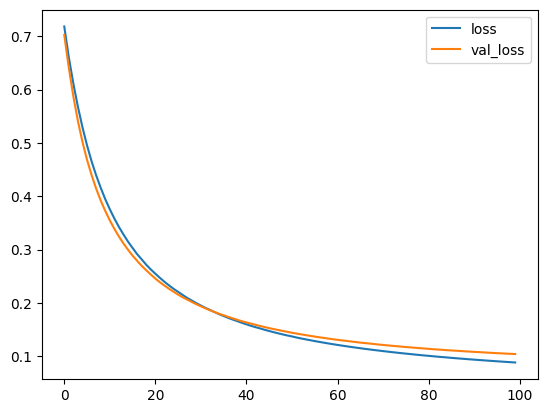

In [ ]:
import matplotlib.pyplot as plt

# Plot the training progress
plt.plot(result.history['loss'], label='loss') # loss per epoch
plt.plot(result.history['val_loss'], label='val_loss') # validation loss per epoch
plt.legend()

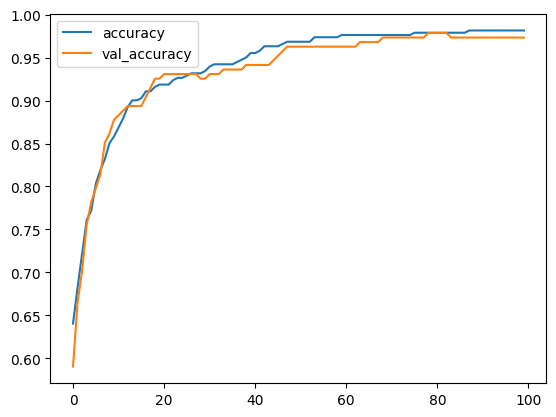

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy') # training accuracy per epoch
plt.plot(result.history['val_accuracy'], label='val_accuracy') # validation accuracy per epoch
plt.legend()